## Gather

In [96]:
import pandas as pd
import requests
import os
from bs4 import BeautifulSoup
import glob
import tweepy
import json
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

1. Load the data from file twitter-archive-enhanced.csv.

In [3]:
tweeter_archive = pd.read_csv('twitter-archive-enhanced.csv')

2. Download file (image_predictions.tsv) from Udacity's server

In [4]:
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open("image_predictions.tsv", mode = 'wb') as file:
    file.write(response.content)

In [5]:
# load the data from image_predictions.tsv
images_predictions = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the tweet IDs in the WeRateDogs Twitter archive to query the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of JSON data in a file called tweet_json.txt file. Then read this .txt file line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count. 

In [6]:
# Use Tweepy API to get retweet count and favorite count.

# delete the key and tokens as requested by the submission requirement.
consumer_key = 
consumer_secret = 
access_token = 
access_token_secret = 

# Authorization to consumer key and consumer secret 
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
# Access to user's access key and access secret 
auth.set_access_token(access_token, access_token_secret)

api = tweepy.API(auth, wait_on_rate_limit = True, wait_on_rate_limit_notify = True)


In [8]:
# user tweepy API to query the tweet data 
tweet_data = {}
tweet_data['tweets'] = []
fails_tweets = {}
fails_count = 0

for tweet_id in tweeter_archive.tweet_id:
    try:
        tweet = api.get_status(int(tweet_id), tweet_mode='extended')
        tweet_data['tweets'].append(tweet._json)
    
    except Exception as e:
        print('tweet_id:' + str(tweet_id) + str(e))
        fails_tweets[tweet_id] = e
        fails_count += 1
    


tweet_id:888202515573088257[{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:873697596434513921[{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:872668790621863937[{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:872261713294495745[{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:869988702071779329[{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:866816280283807744[{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:861769973181624320[{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:856602993587888130[{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:851953902622658560[{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:845459076796616705[{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:844704788403113984[{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:842892208864923648[{'code': 144, '

Rate limit reached. Sleeping for: 650


tweet_id:754011816964026368[{'code': 144, 'message': 'No status found with that ID.'}]
tweet_id:680055455951884288[{'code': 144, 'message': 'No status found with that ID.'}]


Rate limit reached. Sleeping for: 660


In [97]:
# requery if the error code is not 144('no status found with that ID')

print("failed to get tweet data for {} tweet ids".format(fails_count))
requery_list = []
for tweet in fails_tweets:
    print(str(tweet) + ': ' + str(fails_tweets[tweet]))
    if (str(144) not in str(fails_tweets[tweet])):
        requery_list.append(tweet)

print(requery_list)

failed to get tweet data for 25 tweet ids
888202515573088257: [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921: [{'code': 144, 'message': 'No status found with that ID.'}]
872668790621863937: [{'code': 144, 'message': 'No status found with that ID.'}]
872261713294495745: [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329: [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744: [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320: [{'code': 144, 'message': 'No status found with that ID.'}]
856602993587888130: [{'code': 144, 'message': 'No status found with that ID.'}]
851953902622658560: [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705: [{'code': 144, 'message': 'No status found with that ID.'}]
844704788403113984: [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648: [{'code': 144, 'message': 'No status found with that ID.'}

In [98]:
# if the requery list is not null, query the tweet data for the tweet ids in this list

if (len(requery_list) > 0):
    fails_tweets_2 = {}
    for tweet_id in requery_list:
        try:
            tweet = api.get_status(int(tweet_id), tweet_mode='extended')
            tweet_data['tweets'].append(tweet._json)
    
        except Exception as e:
            print('tweet_id:' + str(tweet_id) + str(e))
            fails_tweets_2[tweet_id] = e
    

tweet_id:771004394259247104[{'code': 179, 'message': 'Sorry, you are not authorized to see this status.'}]


In [99]:
# write the tweet data into the file 'tweet_json.txt'

with open('tweet_json.txt', 'w') as file:
    json.dump(tweet_data, file)

In [100]:
# Read this tweet_json.txt file line by line into a pandas DataFrame with tweet ID, retweet count, and favorite count.  

tweet_list = []
with open('tweet_json.txt', 'r') as json_file:
    data = json.load(json_file)
    for d in data['tweets']:
        tweet_list.append({'tweet_id': d['id'],
                         'retweet_count': d['retweet_count'],
                         'favorite_count': d['favorite_count']})
        
    
tweeter_additional = pd.DataFrame(tweet_list, columns = ['tweet_id', 'retweet_count', 'favorite_count'])   

In [101]:
# somehow, sometimes even we receive the error 'Failed to send request' for these two tweet ids, the data has been retrieved successfully.
# It caused duplicated data in the dataset. Keep the requery code in case there is some other error and always check if there is any duplicated entries. 
tweeter_additional[tweeter_additional.duplicated()]

,tweet_id,retweet_count,favorite_count


In [102]:
# delete the duplicated rows
tweeter_additional = tweeter_additional.drop_duplicates()

In [103]:
# there are 25 tweet ids missing tweet contents. So in total there are 2331 records now in the tweeter_additional. 
#We are good with the data.
tweeter_archive.shape, tweeter_additional.shape

((2356, 17), (2331, 3))

## Assess

In [104]:
tweeter_archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None


In [105]:
tweeter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [106]:
tweeter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [107]:
tweeter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1206,715758151270801409,NaN,NaN,2016-04-01 04:30:16 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",This is old now but it's absolutely heckin fantastic and I can't not share it with you all. 13/10 https://t.co/wJX74TSgzP,NaN,NaN,NaN,https://vine.co/v/hYdLVKDpAFu,13,10,old,None,None,None,None
887,759923798737051648,NaN,NaN,2016-08-01 01:28:46 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",We only rate dogs... this is a Taiwanese Guide Walrus. Im getting real heckin tired of this. Please send dogs. 10/10 https://t.co/49hkNAsubi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759923798737051648/photo/1,10,10,None,None,None,None,None
513,811647686436880384,8.116272e+17,4.196984e+09,2016-12-21 19:01:02 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",PUPDATE: I've been informed that Augie was actually bringing his family these flowers when he tripped. Very good boy. Pupgraded to 11/10,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
1534,689993469801164801,NaN,NaN,2016-01-21 02:10:37 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>",Here we are witnessing a rare High Stepping Alaskan Floofer. 12/10 dangerously petable (vid by @TheMrsNux) https://t.co/K4s9IJh2jm,NaN,NaN,NaN,https://vine.co/v/ienexVMZgi5,12,10,None,None,floofer,None,None
1687,681579835668455424,NaN,NaN,2015-12-28 20:57:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Apollo. He thought you weren't coming back so he had a mental breakdown. 8/10 we've all been there https://t.co/ojUBrDCHLT,NaN,NaN,NaN,https://twitter.com/dog_rates/status/681579835668455424/photo/1,8,10,Apollo,None,None,None,None


In [108]:
sum(tweeter_archive['name'].isnull())

0

In [109]:
tweeter_archive['doggo'].value_counts()

None     2259
doggo    97  
Name: doggo, dtype: int64

In [110]:
tweeter_archive['floofer'].value_counts()                       

None       2346
floofer    10  
Name: floofer, dtype: int64

In [111]:
tweeter_archive['pupper'].value_counts()  

None      2099
pupper    257 
Name: pupper, dtype: int64

In [112]:
tweeter_archive['puppo'].value_counts()  

None     2326
puppo    30  
Name: puppo, dtype: int64

In [113]:
tweeter_archive[(tweeter_archive['rating_denominator'] == 0)]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
313,835246439529840640,8.352460e+17,26259576.0,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",NaN,NaN,NaN,NaN,960,0,None,None,None,None,None


In [114]:
tweeter_archive.rating_denominator.value_counts()

10     2333
11     3   
50     3   
80     2   
20     2   
2      1   
16     1   
40     1   
70     1   
15     1   
90     1   
110    1   
120    1   
130    1   
150    1   
170    1   
7      1   
0      1   
Name: rating_denominator, dtype: int64

In [115]:
len(tweeter_archive[~tweeter_archive['retweeted_status_id'].isnull()])

181

In [116]:
# check the text column for the tweeter with rating donominator being 0. The correct rating should be 13/10
pd.set_option('display.max_colwidth', -1)
tweeter_archive[(tweeter_archive['rating_denominator'] == 0)]['text']

313    @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho
Name: text, dtype: object

In [117]:
tweeter_archive.name.value_counts()

None       745
a          55 
Charlie    12 
Lucy       11 
Cooper     11 
           .. 
Mary       1  
Bruno      1  
Sully      1  
Ace        1  
Fynn       1  
Name: name, Length: 957, dtype: int64

In [118]:
tweeter_additional

,tweet_id,retweet_count,favorite_count
0,892420643555336193,7744,36395
1,892177421306343426,5735,31344
2,891815181378084864,3794,23617
3,891689557279858688,7906,39686
4,891327558926688256,8530,37895
...,...,...,...
2326,666049248165822465,41,97
2327,666044226329800704,133,273
2328,666033412701032449,41,113
2329,666029285002620928,42,121


In [119]:
tweeter_additional.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
retweet_count     2331 non-null int64
favorite_count    2331 non-null int64
dtypes: int64(3)
memory usage: 72.8 KB


In [120]:
tweeter_additional.describe()

,tweet_id,retweet_count,favorite_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,2718.015873,7600.474903
std,6.823170e+16,4597.761125,11794.359443
min,6.660209e+17,1.000000,0.000000
25%,6.782670e+17,549.000000,1327.500000
50%,7.182469e+17,1275.000000,3309.000000
75%,7.986692e+17,3156.500000,9311.500000
max,8.924206e+17,78263.000000,157119.000000


In [121]:
tweeter_additional.sample(5)

,tweet_id,retweet_count,favorite_count
2071,670755717859713024,106,427
2297,666430724426358785,179,301
135,864873206498414592,8203,30975
1637,683030066213818368,738,2170
883,758041019896193024,379,2731


In [122]:
images_predictions

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [123]:
images_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [124]:
images_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [125]:
images_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1271,749996283729883136,https://pbs.twimg.com/media/CmfoyrrW8AA8v7w.jpg,1,Old_English_sheepdog,0.515319,True,West_Highland_white_terrier,0.151040,True,soft-coated_wheaten_terrier,0.056420,True
2030,882992080364220416,https://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg,1,Eskimo_dog,0.466778,True,Siberian_husky,0.406044,True,dingo,0.073414,False
787,690374419777196032,https://pbs.twimg.com/media/CZSz3vWXEAACElU.jpg,1,kuvasz,0.286345,True,Labrador_retriever,0.107144,True,ice_bear,0.085086,False
1503,784826020293709826,https://pbs.twimg.com/media/CuRDF-XWcAIZSer.jpg,1,chow,0.090341,True,binoculars,0.083499,False,Irish_setter,0.077456,True
52,666996132027977728,https://pbs.twimg.com/media/CUGlb6iUwAITEbW.jpg,1,hay,0.507637,False,Rottweiler,0.062490,True,water_buffalo,0.048425,False


In [126]:
images_predictions.img_num.value_counts()

1    1780
2    198 
3    66  
4    31  
Name: img_num, dtype: int64

In [127]:
images_predictions[images_predictions['p1_conf'] == 1]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
106,667866724293877760,https://pbs.twimg.com/media/CUS9PlUWwAANeAD.jpg,1,jigsaw_puzzle,1.0,False,prayer_rug,1.011300e-08,False,doormat,1.740170e-10,False


In [128]:
images_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke              89 
Chihuahua             83 
pug                   57 
                      .. 
school_bus            1  
hammer                1  
Japanese_spaniel      1  
piggy_bank            1  
sliding_door          1  
Name: p1, Length: 378, dtype: int64

In [129]:
images_predictions.p2.value_counts()

Labrador_retriever    104
golden_retriever      92 
Cardigan              73 
Chihuahua             44 
Pomeranian            42 
                      .. 
birdhouse             1  
breastplate           1  
bannister             1  
sweatshirt            1  
tree_frog             1  
Name: p2, Length: 405, dtype: int64

In [130]:
images_predictions.p3.value_counts()

Labrador_retriever    79
Chihuahua             58
golden_retriever      48
Eskimo_dog            38
kelpie                35
                      ..
park_bench            1 
standard_schnauzer    1 
chain                 1 
rifle                 1 
go-kart               1 
Name: p3, Length: 408, dtype: int64

In [131]:
all_columns = pd.Series(list(tweeter_archive) + list(tweeter_additional) + list(images_predictions))
all_columns[all_columns.duplicated()]

17    tweet_id
20    tweet_id
dtype: object

## Quality

### 'tweeter_archive' table: 
- retweets and original tweets are mixed up. Retweets are not needed in our dataset.
- Missing data in column: expanded_urls (can't clean)
- Erroneous data types in columns: timestamp, retweeted_status_timestamp, tweet_id, in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id, retweeted_status_user_id. Timestampe should be datetime type, the rest should be object type.
- data type in column: rating_numerator should be float type.
- Wrong rating data in columns: rating_numerator, rating_denominator
- some ratings are for multiple dogs in columns: rating_numerator, rating_denominator.
- Invalid rating denominator (0 in column: rating_denominator)
- Wrong name in column 'name' like such, a, an, quite, the, etc.
- Multiple dog phases for some records.
- '+0000' is appended at the end of time in columns: timestamp, retweeted_status_timestamp
- Duplicated urls in column 'expanded_urls'.
- Tweet id '890971913173991426' has two different urls in column 'expanded_urls'. The second one is same as the one in 'jpf_url' in table 'df_image'

### 'tweeter_additional' table:
- Missing records(2339 instead of 2356)(can't clean)

### 'images_predictions' table:
- Missing records (2075 instead of 2356)(can't clean)
- Some names are starting with lower letter and others are starting with capital letter in columns: p1, p2, p3
- The column of 'jpg_url' is duplicated with column 'expanded_urls' in tweeter_archive table




## Tidiness

### 'tweeter_archive' table:
- One variable in four columns: Doggo, floofer, Pupper, Puppo

### 'tweeter_additional' table:
-  table 'tweeter_additional' should be combined with table 'tweeter_archive'

### 'images_predictions' table:
- table 'images_predictions' should be combined with table 'tweeter_archive'

## Clean

In [147]:
tweeter_archive_clean = tweeter_archive.copy()
tweeter_additional_clean = tweeter_additional.copy()
images_predictions_clean = images_predictions.copy()

### Quality

#### 1. retweets and original tweets are mixed up. Retweets are not needed in our dataset.

##### Define
Remove the records which are identfied as retweets(retweeted_status_id or in_reply_to_status_id is not empty). 

Note: I choose to handle this issue first becasue it will make the tweeter_archive_clean table much cleaner.

##### Code

In [148]:
# remove the tweets with retweeted_status_id or in_reply_to_status_id not empty.
tweeter_archive_clean = tweeter_archive_clean[tweeter_archive_clean['retweeted_status_id'].isnull() & tweeter_archive_clean['in_reply_to_status_id'].isnull()]

# drop these columns since there are no more data
tweeter_archive_clean = tweeter_archive_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'],axis = 1)

##### Test

In [149]:
tweeter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 12 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
doggo                 2097 non-null object
floofer               2097 non-null object
pupper                2097 non-null object
puppo                 2097 non-null object
dtypes: int64(3), object(9)
memory usage: 213.0+ KB


#### 2. The column 'jpg_url' in 'images_predictions' table is duplicated with column 'expanded_urls' in tweeter_archive table

###### define
Remove the column 'jpg_url' from 'images_predictions' table

##### code

In [150]:
images_predictions_clean = images_predictions_clean.drop('jpg_url', axis=1)

##### test

In [151]:
images_predictions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 11 columns):
tweet_id    2075 non-null int64
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(3)
memory usage: 135.9+ KB


### Tidiness

#### 1. One variable in four columns(Doggo, floofer Pupper, Puppo) in 'tweeter_archive' table

##### Define
Melt/Combine the 'Doggo', 'floofer', 'Pupper', 'Puppo' columns to a 'dog_stage' column 

##### Code

In [152]:
tweeter_archive_clean.doggo.replace('None','',inplace=True)
tweeter_archive_clean.pupper.replace('None','',inplace=True)
tweeter_archive_clean.floofer.replace('None','',inplace=True)
tweeter_archive_clean.puppo.replace('None','',inplace=True)

tweeter_archive_clean['dog_stage'] = tweeter_archive_clean.doggo + tweeter_archive_clean.pupper + \
                                  tweeter_archive_clean.floofer + tweeter_archive_clean.puppo


In [153]:
# Handle multiple stages with loc and missing value
tweeter_archive_clean.loc[tweeter_archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper'
tweeter_archive_clean.loc[tweeter_archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'
tweeter_archive_clean.loc[tweeter_archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo'
tweeter_archive_clean.loc[tweeter_archive_clean.dog_stage == '', 'dog_stage'] = np.nan

# Drop the columns 'doggo','floofer', 'pupper' and 'puppo'
tweeter_archive_clean = tweeter_archive_clean.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis = 1)

##### Test

In [156]:
tweeter_archive_clean.dog_stage.value_counts()

pupper           221
doggo            72 
puppo            23 
doggo,pupper     9  
floofer          9  
doggo,puppo      1  
doggo,floofer    1  
Name: dog_stage, dtype: int64

In [157]:
tweeter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 9 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             336 non-null object
dtypes: int64(3), object(6)
memory usage: 163.8+ KB


#### 2. Table 'tweeter_additional' can be combined with table 'tweeter_archive'
#### 3. Table 'images_predictions' should be combined with table 'tweeter_archive'

##### define

Merge the columns in table 'tweeter_additional' and 'images_predictions' to table 'tweeter_archive_clean', joining on 'tweet_id' column

##### code

In [60]:
# merge table tweeter_archive_clean and tweeter_additional_clean
tweeter_archive_clean = pd.merge(tweeter_archive_clean, tweeter_additional_clean,
                            on=['tweet_id'], how='left')

# merge table images_predictions and tweeter_additional_clean
tweeter_archive_clean = pd.merge(tweeter_archive_clean, images_predictions_clean,
                            on=['tweet_id'], how='left')

In [61]:
# replace null value in column retweet_count and favorite_count with 0.
tweeter_archive_clean.retweet_count.replace(np.nan,0, inplace=True)
tweeter_archive_clean.favorite_count.replace(np.nan,0, inplace=True)

# after merging the data type of retweet_count and favorite_count has been changed to float type. Change it back to integer type.
tweeter_archive_clean.retweet_count = tweeter_archive_clean.retweet_count.astype(int)
tweeter_archive_clean.favorite_count = tweeter_archive_clean.favorite_count.astype(int)

##### test

In [62]:
tweeter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 21 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             336 non-null object
retweet_count         2097 non-null int32
favorite_count        2097 non-null int32
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971 non-null

### Quality

3. Erroneous data types in columns: timestamp, tweet_id, retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id and retweeted_status_user_id. Timestampe should be datetime type, the rest should be object type(i.e. string).

4. '+0000' is appended at the end of time in columns: timestamp, retweeted_status_timestamp


#### define
- Remove '+0000' from the end of every timestammp by string slicing and convert Timestampe column's data type from a string to datetime type using to_datetime.
- Convert tweet_id column's data type from integer to object type(string)
- columns retweeted_status_timestamp, in_reply_to_status_id, in_reply_to_user_id,retweeted_status_id and retweeted_status_user_id have already been taken care of during cleaning the tidiness issues.

#### code

In [63]:
# remove '+0000'
tweeter_archive_clean.timestamp = tweeter_archive_clean.timestamp.str[:-5]

# to datetime
tweeter_archive_clean.timestamp = pd.to_datetime(tweeter_archive_clean.timestamp)

# to object type
tweeter_archive_clean.tweet_id = tweeter_archive_clean.tweet_id.astype(str)

##### test

In [64]:
tweeter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 21 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             336 non-null object
retweet_count         2097 non-null int32
favorite_count        2097 non-null int32
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                1971

In [65]:
tweeter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
304,826848821049180160,2017-02-01 17:44:55,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cupid. He was found in the trash. Now he's well on his way to prosthetic front legs and a long happy doggo life. 13/10 heroic af https://t.co/WS0Gha8vRh,"https://twitter.com/dog_rates/status/826848821049180160/photo/1,https://twitter.com/dog_rates/status/826848821049180160/photo/1,https://twitter.com/dog_rates/status/826848821049180160/photo/1,https://twitter.com/dog_rates/status/826848821049180160/photo/1",13,10,Cupid,doggo,10328,...,4.0,Great_Pyrenees,0.858764,True,golden_retriever,0.023526,True,Pekinese,0.017104,True
1028,711694788429553666,2016-03-20 23:23:54,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Oh. My. God. 13/10 magical af https://t.co/Ezu6jQrKAZ,https://twitter.com/dog_rates/status/711694788429553666/photo/1,13,10,None,NaN,18297,...,1.0,brown_bear,0.713293,False,Indian_elephant,0.172844,False,water_buffalo,0.038902,False
1352,687102708889812993,2016-01-13 02:43:46,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Army of water dogs here. None of them know where they're going. Have no real purpose. Aggressive barks. 5/10 for all https://t.co/A88x73TwMN,https://twitter.com/dog_rates/status/687102708889812993/photo/1,5,10,None,NaN,981,...,1.0,fiddler_crab,0.992069,False,quail,0.002491,False,rock_crab,0.001513,False
91,872122724285648897,2017-06-06 16:07:15,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kody. He's a baller. Wishes he was a little bit taller. Double dribbles often. Still 12/10 would happily get dunked on https://t.co/PKSpmiefwN,"https://twitter.com/dog_rates/status/872122724285648897/photo/1,https://twitter.com/dog_rates/status/872122724285648897/photo/1",12,10,Kody,NaN,7503,...,1.0,basketball,0.808396,False,pug,0.066736,True,dalmatian,0.054570,True
678,760893934457552897,2016-08-03 17:43:45,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Wishes. He has the day off. Daily struggles of being a doggo have finally caught up with him. 11/10 https://t.co/H9YgrUkYwa,https://twitter.com/dog_rates/status/760893934457552897/photo/1,11,10,Wishes,doggo,989,...,1.0,Blenheim_spaniel,0.113992,True,cocker_spaniel,0.105780,True,borzoi,0.073935,True


#### 5.  rating_numerator should be float type instead of integer.

#### define
Convert rating_numerator column's data type from integer to float type.

#### code

In [66]:
tweeter_archive_clean.rating_numerator = tweeter_archive_clean.rating_numerator.astype(float)
#tweeter_archive_clean.rating_denominator = tweeter_archive_clean.rating_denominator.astype(float)

#### test

In [67]:
tweeter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2096
Data columns (total 21 columns):
tweet_id              2097 non-null object
timestamp             2097 non-null datetime64[ns]
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null float64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             336 non-null object
retweet_count         2097 non-null int32
favorite_count        2097 non-null int32
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-null float64
p3_dog                19

In [68]:
tweeter_archive_clean.rating_numerator.value_counts()

12.0      486
10.0      436
11.0      413
13.0      287
9.0       153
8.0       98 
7.0       52 
14.0      38 
5.0       34 
6.0       32 
3.0       19 
4.0       16 
2.0       9  
1.0       5  
24.0      1  
27.0      1  
84.0      1  
0.0       1  
420.0     1  
75.0      1  
80.0      1  
60.0      1  
44.0      1  
26.0      1  
144.0     1  
88.0      1  
121.0     1  
99.0      1  
204.0     1  
1776.0    1  
45.0      1  
165.0     1  
50.0      1  
Name: rating_numerator, dtype: int64

#### 6. Some ratings are for multiple dogs in columns: rating_numerator, rating_denominator.
#### 7. Invalid rating denominator (0 in column: rating_denominator)


##### define
1. The issue of 0 as rating donominator has been taken care of when removing the retweets.
2. Remove the records with rating denominator being mulitple 10s since they are actually rated for multiple dogs. For data consistent purpose, I want to keep only a rating for a dog per records.

##### code

In [69]:
tweeter_archive_clean = tweeter_archive_clean[(tweeter_archive_clean['rating_denominator'] == 10) |
                                              ((tweeter_archive_clean['rating_denominator'] % 10) != 0)]

##### test

In [70]:
tweeter_archive_clean.rating_denominator.value_counts()

10    2080
11    2   
7     1   
2     1   
Name: rating_denominator, dtype: int64

#### 8. Wrong rating data in columns: rating_numerator, rating_denominator

##### define
Fix the specific records with wrong rating numerator and wrong rating denominator

##### code

In [71]:
tweeter_archive_clean[(tweeter_archive_clean['rating_denominator'] == 11) |
                      (tweeter_archive_clean['rating_denominator'] == 7) |
                      (tweeter_archive_clean['rating_denominator'] == 2)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
403,810984652412424192,2016-12-19 23:06:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,"https://www.gofundme.com/sams-smile,https://twitter.com/dog_rates/status/810984652412424192/photo/1",24.0,7,Sam,NaN,1470,...,1.0,golden_retriever,0.871342,True,Tibetan_mastiff,0.036708,True,Labrador_retriever,0.025823,True
853,740373189193256964,2016-06-08 02:41:38,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ","https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1,https://twitter.com/dog_rates/status/740373189193256964/photo/1",9.0,11,None,NaN,13335,...,3.0,golden_retriever,0.807644,True,kuvasz,0.101286,True,Labrador_retriever,0.023785,True
1426,682962037429899265,2016-01-01 16:30:13,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10 https://t.co/7EsP8LmSp5,https://twitter.com/dog_rates/status/682962037429899265/photo/1,7.0,11,Darrel,NaN,16595,...,1.0,dingo,0.278600,False,Chihuahua,0.155207,True,loupe,0.153598,False
2076,666287406224695296,2015-11-16 16:11:11,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,https://twitter.com/dog_rates/status/666287406224695296/photo/1,1.0,2,an,NaN,62,...,1.0,Maltese_dog,0.857531,True,toy_poodle,0.063064,True,miniature_poodle,0.025581,True


In [72]:
# fix the rating issue for these specific error cases indivisually
tweeter_archive_clean.loc[(tweeter_archive_clean['tweet_id'] == '740373189193256964'),'rating_denominator'] = 10
tweeter_archive_clean.loc[(tweeter_archive_clean['tweet_id'] == '740373189193256964'),'rating_numerator'] = 14

tweeter_archive_clean.loc[(tweeter_archive_clean['tweet_id'] == '682962037429899265'),'rating_denominator'] = 10
tweeter_archive_clean.loc[(tweeter_archive_clean['tweet_id'] == '682962037429899265'),'rating_numerator'] = 10

tweeter_archive_clean.loc[(tweeter_archive_clean['tweet_id'] == '666287406224695296'),'rating_denominator'] = 10
tweeter_archive_clean.loc[(tweeter_archive_clean['tweet_id'] == '666287406224695296'),'rating_numerator'] = 9

tweeter_archive_clean.loc[(tweeter_archive_clean['tweet_id'] == '810984652412424192'),'rating_denominator'] = np.nan
tweeter_archive_clean.loc[(tweeter_archive_clean['tweet_id'] == '810984652412424192'),'rating_numerator'] = np.nan


##### test

In [73]:
tweeter_archive_clean.rating_denominator.value_counts()

10.0    2083
Name: rating_denominator, dtype: int64

#### 9. Duplicated urls in column 'expanded_urls'.
#### 10. Tweet id '890971913173991426' has two different urls in column 'expanded_urls'. The second one is same as the one in 'jpf_url' in table 'df_image'

##### define
1. for the record with tweet id '890971913173991426', keep the second url to be consistent with the one in 'jpf_url'
2. remove the duplicated urls. Keep the last url in the list to accomodate the fix fo the issue above.


##### code

In [74]:
tweeter_archive_clean.expanded_urls = tweeter_archive_clean.expanded_urls.str.split(',').str[-1]

tweeter_archive_clean.rename(index=str, columns={"expanded_urls": "expanded_url"}, inplace=True)

##### test

In [75]:
tweeter_archive_clean.sample(5)

,tweet_id,timestamp,source,text,expanded_url,rating_numerator,rating_denominator,name,dog_stage,retweet_count,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
788,748324050481647620,2016-06-30 01:15:31,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Duke. He permanently looks like he just tripped over something. 11/10 https://t.co/1sNtG7GgiO,https://twitter.com/dog_rates/status/748324050481647620/photo/1,11.0,10.0,Duke,NaN,767,...,1.0,Shetland_sheepdog,0.880499,True,collie,0.107901,True,Pembroke,0.003607,True
1042,710269109699739648,2016-03-17 00:58:46,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",The squad is back for St. Patrick's Day! ☘ 💚\n13/10 for all https://t.co/OcCDb2bng5,https://twitter.com/dog_rates/status/710269109699739648/photo/1,13.0,10.0,None,NaN,1122,...,1.0,pug,0.415495,True,German_shepherd,0.178157,True,Labrador_retriever,0.100202,True
799,747512671126323200,2016-06-27 19:31:23,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Guys pls stop sending actual sharks. It's too dangerous for me and the people taking the photos. Thank you ...10/10 https://t.co/12lICZN2SP,https://twitter.com/dog_rates/status/747512671126323200/photo/1,10.0,10.0,None,NaN,1618,...,1.0,Cardigan,0.111493,True,malinois,0.095089,True,German_shepherd,0.080146,True
478,793962221541933056,2016-11-02 23:45:19,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Maximus. His face is stuck like that. Tragic really. Great tongue tho. 12/10 would pet firmly https://t.co/xIfrsMNLBR,https://twitter.com/dog_rates/status/793962221541933056/photo/1,12.0,10.0,Maximus,NaN,5033,...,1.0,Labrador_retriever,0.861651,True,golden_retriever,0.044462,True,Staffordshire_bullterrier,0.016497,True
836,742534281772302336,2016-06-14 01:49:03,"<a href=""http://vine.co"" rel=""nofollow"">Vine - Make a Scene</a>","For anyone who's wondering, this is what happens after a doggo catches it's tail... 11/10 https://t.co/G4fNhzelDv",https://vine.co/v/iLTZmtE1FTB,11.0,10.0,None,doggo,3585,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [76]:
##### save the cleaned tables to twitter_archive_master.csv file.

tweeter_archive_clean.to_csv('twitter_archive_master.csv', index=False)


### Insights and Visualizations

In [77]:
tweeter_archive_clean.dog_stage.value_counts()

pupper           221
doggo            72 
puppo            23 
doggo,pupper     9  
floofer          9  
doggo,puppo      1  
doggo,floofer    1  
Name: dog_stage, dtype: int64

In [78]:
tweeter_archive_clean.dog_stage.count(), tweeter_archive_clean.shape[0]

(336, 2084)

In [79]:
tweeter_archive_clean.quantile([0.25, 0.5, 0.75,0.95, 0.99,1.0])

,rating_numerator,rating_denominator,retweet_count,favorite_count,img_num,p1_conf,p2_conf,p3_conf
0.25,10.0,10.0,556.75,1834.75,1.0,0.362656,0.053616,0.016053
0.50,11.0,10.0,1225.00,3823.00,1.0,0.587635,0.117537,0.049410
0.75,12.0,10.0,2889.50,10482.75,1.0,0.847216,0.195856,0.091555
0.95,13.0,10.0,8274.35,29095.20,2.0,0.990260,0.328507,0.157088
0.99,14.0,10.0,19648.88,54385.22,4.0,0.999438,0.417340,0.201878
1.00,1776.0,10.0,78263.00,157119.00,4.0,1.000000,0.488014,0.271042


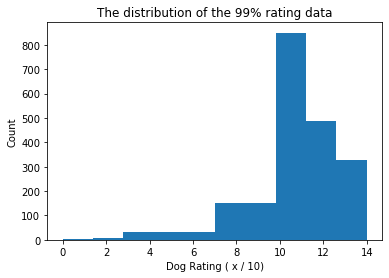

In [80]:
# Plot the dog rating data
# Since there are some extreme data, take a look at the plot of 99% data.
rating_numerator_99 = tweeter_archive_clean.rating_numerator.quantile(0.99)
rating_numerator_99_set = tweeter_archive_clean[tweeter_archive_clean['rating_numerator'] <= rating_numerator_99]

plt.hist(rating_numerator_99_set.rating_numerator)
plt.title('The distribution of the 99% rating data')
plt.xlabel('Dog Rating ( x / 10)')
plt.ylabel('Count')
plt.show()


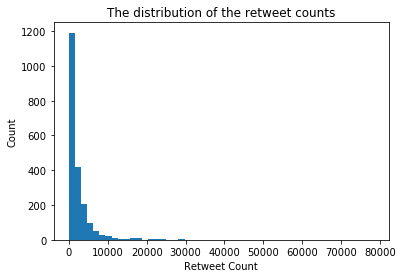

In [81]:
# plot the distribution of retweet counts
plt.hist(tweeter_archive_clean.retweet_count, bins=50)
plt.title('The distribution of the retweet counts')
plt.xlabel('Retweet Count')
plt.ylabel('Count')
plt.show()

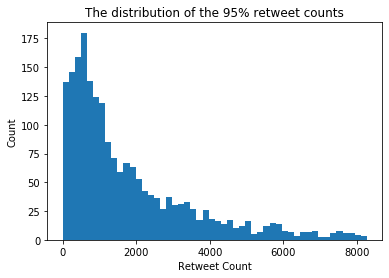

In [82]:
# Since there are some extreme data, take a look at the plot of 95% data.
retweet_count_95 = tweeter_archive_clean.retweet_count.quantile(0.95)
retweet_count_95_set = tweeter_archive_clean[tweeter_archive_clean['retweet_count'] <= retweet_count_95]
plt.hist(retweet_count_95_set.retweet_count, bins=50)
plt.title('The distribution of the 95% retweet counts')
plt.xlabel('Retweet Count')
plt.ylabel('Count')
plt.show()

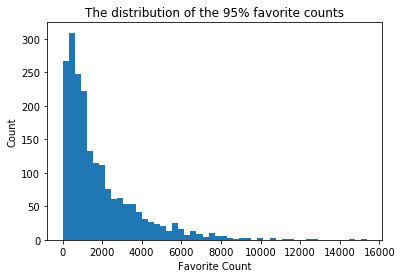

In [83]:
# Since there are some extreme data, take a look at the plot of 95% data.
favorite_count_95 = tweeter_archive_clean.favorite_count.quantile(0.95)
favorite_count_95_set = tweeter_archive_clean[tweeter_archive_clean['favorite_count'] <= favorite_count_95]
plt.hist(favorite_count_95_set.retweet_count, bins=50)
plt.title('The distribution of the 95% favorite counts')
plt.xlabel('Favorite Count')
plt.ylabel('Count')
plt.show()

#### Insights:
1. Not many people share their dogs' stage.  There are 2084 records in total after the dataset is cleaned. But the total count that have dog stage data is only 336.  Among this 336, pupper is the most common stage,which is 230.
2. The median dog rating is 11/10. 99% of dogs got rating under 14/11. There is an extreme case of 1776/10. We should exclude 1776 if further analysis is done on dog rating.
3. The distribution of retweet count is right skewed. If only 95% data is used more details can be seen in the plot. The median retweet count is 1305.5. And 95% user's retweet count is under 8876.15.
4. The distribution of favorite count is also right skewed, very similar to that of retweet count. The median retweet count is 3983.5. And 95% user's retweet count is under 30225.40.

##### Please be noticed all the analysis and visualization are based on the cleaned dataset of tweeter_archive_clean.

### Reference
1. https://knowledge.udacity.com/questions/22750
2. https://developer.twitter.com/en/docs/tweets/data-dictionary/overview/tweet-object
3. http://docs.tweepy.org/en/v3.5.0/index.html
4. https://www.geeksforgeeks.org/extraction-of-tweets-using-tweepy/
5. https://knowledge.udacity.com/questions/17360